In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
users = pd.read_csv('takehome_users.csv', parse_dates=['creation_time'])
engagement = pd.read_csv('takehome_user_engagement.csv')

# Set dtypes
users = users.astype({'object_id': pd.Int64Dtype(),
                    'name': 'category',
                    'email': 'category',
                    'creation_source': 'category',
                    # 'last_session_creation_time': pd.Timedelta(),
                    'opted_in_to_mailing_list': bool,
                    'enabled_for_marketing_drip': bool,
                    'org_id': 'category',
                    'invited_by_user_id': pd.Int64Dtype()})
users['last_session_creation_time'] = pd.to_timedelta(users['last_session_creation_time'])
users = users.set_index('object_id')

engagement = engagement.astype({'user_id': 'category',
                                'visited': pd.Int8Dtype(),
                                'user_id': 'category'})
engagement['time_stamp'] = pd.to_datetime(engagement['time_stamp'])
engagement = engagement.set_index('time_stamp')

In [4]:
users.dtypes

creation_time                  datetime64[ns]
name                                 category
email                                category
creation_source                      category
last_session_creation_time    timedelta64[ns]
opted_in_to_mailing_list                 bool
enabled_for_marketing_drip               bool
org_id                               category
invited_by_user_id                      Int64
dtype: object

There's no common columns for joining the two dataframes. 

## Exploring the Engagement table

In [79]:
engagement

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1
...,...,...
2013-09-06 06:14:15,11996,1
2013-01-15 18:28:37,11997,1
2014-04-27 12:45:16,11998,1


<AxesSubplot:xlabel='time_stamp'>

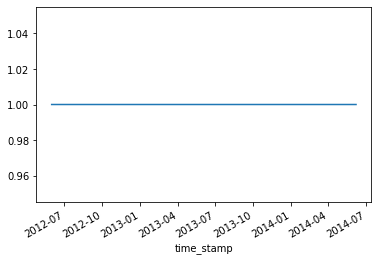

In [6]:
engagement['visited'].plot()

In [7]:
engagement['visited'].value_counts()

1    207917
Name: visited, dtype: Int64

All values of engagement['visited'] are 1.

In [8]:
def plot_grouped(grouped, by=None):
    mean = grouped.count().mean().iloc[0]
    std = grouped.count().std().iloc[0]
    grouped.count().plot()
    plt.axhline(mean, color='gray', linestyle = '-', alpha=0.5, label='mean')
    plt.axhline(mean+std, color='gray', linestyle = '--', alpha=0.2, label='1 st. dev.')
    plt.axhline(mean-std, color='gray', linestyle = '--', alpha=0.2)
    plt.legend()

Text(0, 0.5, 'Count')

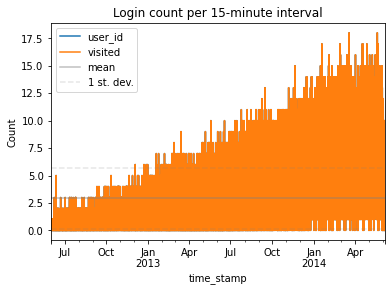

In [9]:
engagement_15T = engagement.resample('15T')

plot_grouped(engagement_15T)
plt.title('Login count per 15-minute interval')
plt.ylabel('Count')

The 15 minute aggregation has too much data to make sense of on a simple plot.

Text(0, 0.5, 'Count')

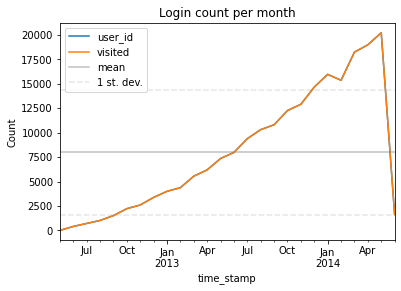

In [10]:
engagement_1M = engagement.resample('M')

plot_grouped(engagement_1M)
plt.title('Login count per month')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

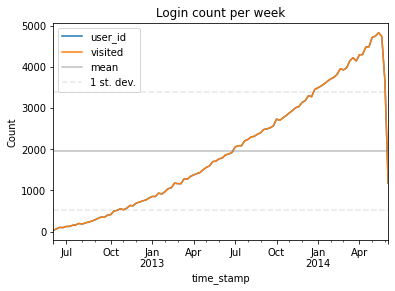

In [11]:
engagement_1W = engagement.resample('W')

plot_grouped(engagement_1W)
plt.title('Login count per week')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

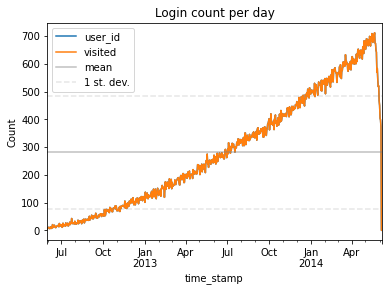

In [12]:
engagement_1D = engagement.resample('D')

plot_grouped(engagement_1D)
plt.title('Login count per day')
plt.ylabel('Count')

<AxesSubplot:xlabel='time_stamp'>

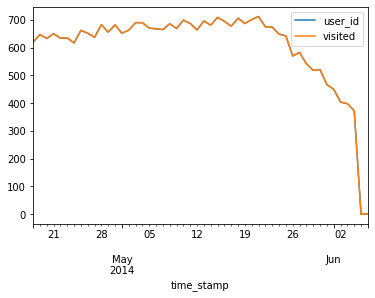

In [13]:
engagement_1D.count().tail(50).plot()

We can see the the daily, weekly, and monthly charts above, that the users' logins per unit time has increased steadily since June 2012 but descreased sharply after May 22, 2014.

From the engagement table alone, we don't have any data to explain this sharp decline.

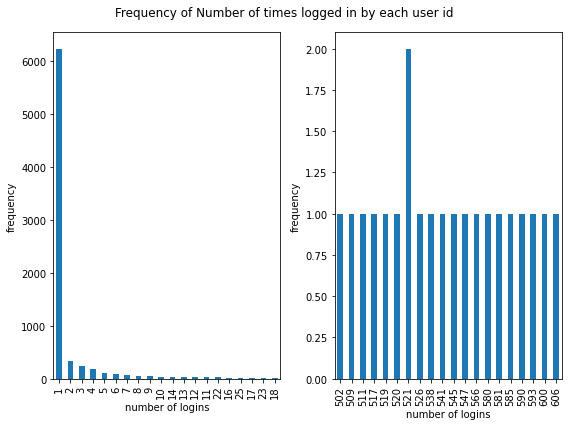

In [69]:
fig, ax = plt.subplots(1, 2, figsize=(8,6))

engagement_by_user = engagement.groupby('user_id')
engagement_by_user.count().squeeze().value_counts().head(20).plot(kind='bar', ax=ax[0])
ax[0].set_ylabel('frequency')
ax[0].set_xlabel('number of logins')
fig.suptitle('Frequency of Number of times logged in by each user id')

engagement_by_user.count().squeeze().value_counts().sort_index().tail(20).plot(kind='bar', ax=ax[1])
ax[1].set_ylabel('frequency')
ax[1].set_xlabel('number of logins')
# ax[1].set_title('Frequency of Number of times logged in by each user id')

plt.tight_layout()

Most users have logged on only one time ever, as shown in the first chart above. 

The second chart shows that there are two frequent users who logged in at least 600 times, and there are 20 users who have logged in more than 20 times.

## Exploring the Users table

In [77]:
users

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
object_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,0 days 00:00:01.398138810,True,False,11,10803
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0 days 00:00:01.396237504,False,False,1,316
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0 days 00:00:01.363734892,False,False,94,1525
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0 days 00:00:01.369210168,False,False,1,5151
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0 days 00:00:01.358849660,False,False,193,5240
...,...,...,...,...,...,...,...,...,...
11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,0 days 00:00:01.378448055,False,False,89,8263
11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,0 days 00:00:01.358274517,False,False,200,<NA>
11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,0 days 00:00:01.398602716,True,True,83,8074


In [85]:
# check missing values
users.isna().sum()

creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

About 25% of the last_session_creation_time is missing. This means that the user account was made by the users never logged in after making the account.
Over 45% of invited_by_user_id is missing. This means that the user created an account without being invited by a current user.

Let's check if there is any overlap between users who never logged in after making an account, and users who created an account without being invited by a current user.

In [94]:
never_logged_in

object_id
1        False
2        False
3        False
4        False
5        False
         ...  
11996    False
11997    False
11998    False
11999    False
12000    False
Name: last_session_creation_time, Length: 12000, dtype: bool

In [105]:
uninvited = users['invited_by_user_id'].isna()
never_logged_in = users['last_session_creation_time'].isna()

print(f'There are {users[uninvited & never_logged_in].shape[0]} uninvited users who created an account but never logged in.')
print(f'There are {users[uninvited & ~never_logged_in].shape[0]} uninvited users who created an account logged in at least once.\n')

print(f'There are {users[~uninvited & never_logged_in].shape[0]} invited users who created an account but never logged in.')
print(f'There are {users[~uninvited & ~never_logged_in].shape[0]} invited users who created an account logged in at least once.')


There are 1536 uninvited users who created an account but never logged in.
There are 4047 uninvited users who created an account logged in at least once.

There are 1641 invited users who created an account but never logged in.
There are 4776 invited users who created an account logged in at least once.


About 75% percent of accounts login at least once. 
Invited users are more likely to login at least once, relative to uninvited users.

In [74]:
# check for  duplicate rows
users.duplicated().sum()

0

There are no duplicate rows in the users table.

In [86]:
# check for duplicates in each column
for col in ['creation_time', 
            'name', 
            'email', 
            'creation_source',
            'last_session_creation_time', 
            'org_id',
            'invited_by_user_id']:
    print(f'col:{col}\nduplicated count:{users[col].duplicated().sum()}\n')
    

col:creation_time
duplicated count:4

col:name
duplicated count:651

col:email
duplicated count:20

col:creation_source
duplicated count:11995

col:last_session_creation_time
duplicated count:3178

col:org_id
duplicated count:11583

col:invited_by_user_id
duplicated count:9435



Unexpectedly, there are:
651 duplicated names in the data,
20 duplicated emails,

Expectedly:
99% of the data for creation_source is duplicated,
95% of the data in org_id is duplicated.
